In [1]:
# O'Reilly Bayes 
# Chapter 3 - Distributions

In [2]:
# Will resolve the Cookie problem with the Pmf function and library empiricaldist

In [3]:
import numpy as np
import pandas as pd
from empiricaldist import Pmf

In [4]:
coin = Pmf()
coin['head'] = 1/2
coin['tails'] = 1/2
coin

,probs
head,0.5
tails,0.5


In [5]:
die = Pmf.from_seq([1,2,3,4,5,6])
die

,probs
1,0.166667
2,0.166667
3,0.166667
4,0.166667
5,0.166667
6,0.166667


In [6]:
letters = Pmf.from_seq(list('Mississippi'))
letters

,probs
M,0.090909
i,0.363636
p,0.181818
s,0.363636


In [7]:
letters['s']

0.36363636363636365

In [8]:
letters('s')

0.36363636363636365

In [9]:
letters('t')

0

In [10]:
die([1,4,7])

array([0.16666667, 0.16666667, 0.        ])

In [11]:
# Cookie problem revisited
# 

In [12]:
prior = Pmf.from_seq(['Bowl 1', 'Bowl 2'])
prior

,probs
Bowl 1,0.5
Bowl 2,0.5


In [13]:
likelihood_vanilla = [0.75, 0.5]
posterior = prior * likelihood_vanilla
posterior

# how long do I have to live the POW life.  I am not an actress or role player. I CLIMBED into Canada, and
# left all my earthly possesions in Maine after NYC because no one ever offers to help me.They just tell me
# to have faith and then let me continue to be enslaved by people who aren't even related but 
# I don't owe anything to anyone, especially not someone interrogated by the CIA?!?!? Are you talking 
# about Egypt? Why does everyone get to decide I have to pay for every sin committed by everyone?  
# I really am the child in the Ones who Walk Away from Omelas.  Everyone can blame everything on me.
# Even Egypt wouldn't want the same for me.  I build and sell ships through Foreign Military Sales
# not interrogate people. 



,probs
Bowl 1,0.375
Bowl 2,0.250


In [14]:
posterior.normalize()

0.625

In [15]:
posterior

,probs
Bowl 1,0.6
Bowl 2,0.4


In [16]:
posterior('Bowl 1')

0.6

In [17]:
posterior *= likelihood_vanilla
posterior.normalize()
posterior

,probs
Bowl 1,0.692308
Bowl 2,0.307692


In [18]:
likelihood_chocolate = [0.25, 0.5]
posterior *= likelihood_chocolate
posterior.normalize()
posterior

,probs
Bowl 1,0.529412
Bowl 2,0.470588


In [19]:
# Modified Cookie
# 101 bowls, bowl n contains n% vanilla cookies
# What is the probablity that a selected cookie came from bowl n

In [20]:
hypos = np.arange(101)

In [21]:
# Pmf(prior probability, sequence of quanitities)
prior = Pmf(1, hypos)
prior.normalize()

101

In [22]:
prior.head()

,probs
0,0.009901
1,0.009901
2,0.009901


In [23]:
likelihood_vanilla = hypos / 100
likelihood_vanilla[:5]

array([0.  , 0.01, 0.02, 0.03, 0.04])

In [24]:
posterior1 = prior * likelihood_vanilla
posterior1.normalize()
posterior1.head()

,probs
0,0.000000
1,0.000198
2,0.000396


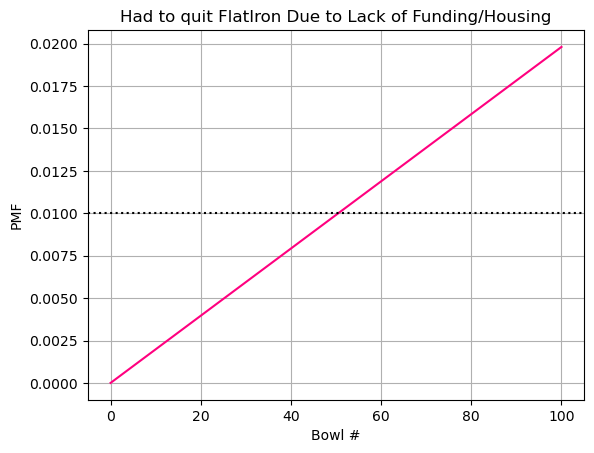

In [25]:
# plot
import matplotlib.pyplot as plt 
fig, ax = plt.subplots()
ax.plot(posterior1, color = "#FF007F")
plt.axhline(y = .01, color = '#000000', linestyle = ':')

ax.set(xlabel='Bowl #', ylabel='PMF',
       title='Had to quit FlatIron Due to Lack of Funding/Housing')
ax.grid()


plt.show()

In [26]:
posterior2 = posterior1 * likelihood_vanilla
posterior2.normalize()
posterior2.head()

,probs
0,0.000000
1,0.000003
2,0.000012


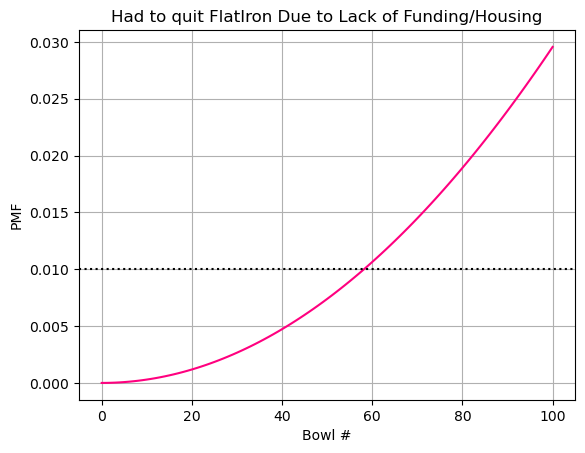

In [27]:
# plot
import matplotlib.pyplot as plt 
fig, ax = plt.subplots()
ax.plot(posterior2, color = "#FF007F")
plt.axhline(y = .01, color = '#000000', linestyle = ':')

ax.set(xlabel='Bowl #', ylabel='PMF',
       title='Had to quit FlatIron Due to Lack of Funding/Housing')
ax.grid()
plt.show()

In [28]:
likelihood_chocolate = 1 - hypos/100
posterior3 = posterior2 * likelihood_chocolate
posterior3.normalize()

0.2462686567164179

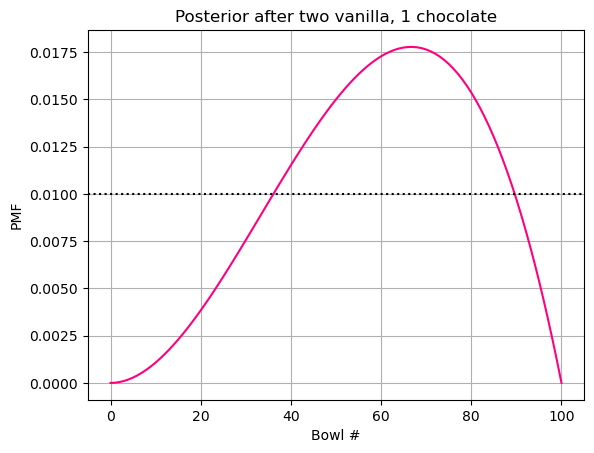

In [29]:
# plot
import matplotlib.pyplot as plt 
fig, ax = plt.subplots()
ax.plot(posterior3, color = "#FF007F")
plt.axhline(y = .01, color = '#000000', linestyle = ':')

ax.set(xlabel='Bowl #', ylabel='PMF',
       title='Posterior after two vanilla, 1 chocolate')
ax.grid()
plt.show()

In [30]:
# As the number of vanilla cookies increases, the number of chocolate decrease until bowl 100
# where there are none

# The peak of the posterior distro is at Bowl 67.
# The quanitity with the highest posterior probability is called the MAP, 
# the "maximum a posteori probability"

#To compute the MAP, we can use the Series method idmax:

In [31]:
posterior3.idxmax()

67

In [32]:
posterior3.max_prob()

67

In [33]:
# Using pmf to solve the dice problem
# a box wtih a 6-sided die, an 8-sided die, and a 12-sided die.
# I choose one of the dice at random, roll it, and report that the outcome is a 1.
# What is the probability that I chose the 6-sided die?

In [34]:
hypos = [6,8,12]

In [35]:
prior = Pmf(1/3, hypos)
prior

,probs
6,0.333333
8,0.333333
12,0.333333


In [36]:
# As in the previous example, the prior probability gets broadcast across the hypotheses
# qs contains the quantities in the distribution
# ps contains the corresponding probabilities

In [37]:
prior.qs

array([ 6,  8, 12])

In [38]:
prior.ps

array([0.33333333, 0.33333333, 0.33333333])

In [39]:
likelihood1 = 1/6, 1/8, 1/12
posterior = prior * likelihood1
posterior.normalize()
posterior

,probs
6,0.444444
8,0.333333
12,0.222222


In [40]:
# Now I roll a 7, what are the likelihoods

In [41]:
likelihood2 = 0, 1/8, 1/12
posterior *= likelihood2
posterior.normalize()
posterior

,probs
6,0.000000
8,0.692308
12,0.307692


In [42]:
# Modified Dice Problem

In [43]:
# a function to do the update in previous section

In [44]:
def update_dice(pmf, data):
    """Update pmf based on new data."""
    hypos = pmf.qs
    likelihood = 1/hypos
    impossible = (data > hypos)
    likelihood[impossible] = 0
    pmf *= likelihood
    pmf.normalize()

In [45]:
# here impossible is a boolean series that is true for each impossible outcome.
# used as an index into likelihood to set corresponding probablities to 0.

In [46]:
pmf = prior.copy()
pmf

,probs
6,0.333333
8,0.333333
12,0.333333


In [47]:
update_dice(pmf, 1)
update_dice(pmf, 7)
pmf

,probs
6,0.000000
8,0.692308
12,0.307692


In [48]:
# Exercise 3-1
# Suppose I have a box with a 6-sided die, an 8-sided die, and a 12-sided die.  I choose one of the dice at random, roll
# it four times, and get 1, 3, 5 and 7.  What is the probability that I chose the 8 sided die?
# you can use the update_dice function or do it yourself.

In [49]:
hypos = [6, 8, 12]
prior = Pmf(1/3, hypos)
prior

,probs
6,0.333333
8,0.333333
12,0.333333


In [50]:
likelihoodroll1 = 1/6, 1/8, 1/12
likelihoodroll2 = 1/6, 1/8, 1/12
likelihoodroll3 = 1/6, 1/8, 1/12
likelihoodroll4 = 0, 1/8, 1/12

posterior = prior * likelihoodroll1
posterior.normalize()
posterior

,probs
6,0.444444
8,0.333333
12,0.222222


In [51]:
posterior *= likelihoodroll2
posterior.normalize()
posterior

,probs
6,0.551724
8,0.310345
12,0.137931


In [52]:
posterior *= likelihoodroll3
posterior.normalize()
posterior

,probs
6,0.646465
8,0.272727
12,0.080808


In [53]:
posterior *= likelihoodroll4
posterior.normalize()
posterior

,probs
6,0.000000
8,0.835052
12,0.164948


In [54]:
pmf = prior.copy()
update_dice (pmf, 1)
update_dice (pmf, 3)
update_dice (pmf, 5)
update_dice (pmf, 7)
pmf

,probs
6,0.000000
8,0.835052
12,0.164948


In [55]:
# Exercise 3-2
# In the previous version of the dice problem, the prior probabilities are the same because the box 
# contains one of each die.  But suppose the box contains 1 die that is 4-sided, 
# 2 dice that are 6-sided, 3 dice that are 8-sided, 4 dice that are 12-sided, and 
# 5 dice that are 20-sided.  I choose a die, roll it, and get a 7.  What is the probability that I chose
# an 8-sided die?
# Hint: To make the prior distribution, call Pmf with two parameters.
# https://greenteapress.com/thinkstats/Pmf.html

# There is no satisfactory documentation for Pmf.  I have no idea how else I can use it or how it behaves
# if passed more arguments and that is deeper into the coding than I want to go. I'm an engineer not a developer

In [56]:
sum(range(1, 6))

15

In [57]:
hypos = []
hypos

[]

In [58]:
sides = [4,6,8,12,20] 
def hypos_list(n,sides):
    for x in sides:
        hypos.extend([x]*n)
        n += 1
    print (hypos)
    return hypos;

hypos_list(1, sides)
len(hypos)

[4, 6, 6, 8, 8, 8, 12, 12, 12, 12, 20, 20, 20, 20, 20]


15

In [59]:
prior = Pmf(1/30, hypos)
prior

,probs
4,0.033333
6,0.033333
6,0.033333
8,0.033333
8,0.033333
8,0.033333
12,0.033333
12,0.033333
12,0.033333
12,0.033333


In [60]:
likelies = [1/4,1/6,1/8,1/12,1/20] 
newlist = []
def likely_list(n,likelies):
    for x in likelies:
        newlist.extend([x]*n)
        n += 1
    print (newlist)
    return newlist;

likely_list(1, likelies)
len (newlist)



[0.25, 0.16666666666666666, 0.16666666666666666, 0.125, 0.125, 0.125, 0.08333333333333333, 0.08333333333333333, 0.08333333333333333, 0.08333333333333333, 0.05, 0.05, 0.05, 0.05, 0.05]


15

In [61]:
posterior = prior * newlist
posterior.normalize()
posterior

,probs
4,0.162162
6,0.108108
6,0.108108
8,0.081081
8,0.081081
8,0.081081
12,0.054054
12,0.054054
12,0.054054
12,0.054054


In [62]:
# Each six sided day has a normalized probability of 0.081081, so the sum of the three 
print(0.081081 * 3)

0.243243


In [63]:
# Should be one
posterior.sum()

1.0000000000000004

In [64]:
# Exercise 3-3
# Suppose I have two sock drawers.  One contains equal numbers of black and white socks.  The other contains
# equal numbers of red, green, and blue socks.  Suppose I choose a drawer at random, choose two socks at random
# and I tell you that I got a matching pair.  What is the probability that the socks are white?

# you need to let them know that I may not be impressive enough for anyone to hire as an engineer.  I haven't
# done the engineering in years.  I have been planning and managing.  But I absolutely am an engineer, 
# not pretending.

#Why do you think I look so unreal and so unprepared... because they told everone I was a pyscho who
# attacked LGBTQ people. Completely untrue and no one will hire me.  It isn't my job to show you what
# this is like.  I am actually an intelligence student from the Defense Intel Agency.  Yes I managed the 
# automated Intelligence Contingency Funds Voucher Processing System project.  The contracting company
# has their own TPM.  I didn't have to know how to develop.  I DID work to ensure user requirements were 
# written.  

In [65]:
# What is the probability the two socks are white?
# two socks are chosen from a drawer
# data (two white socks chosen)
# 50% chance of BW drawer chosen
# 33% chance that you will pick a white sock from a drawer of three colors.  Also assuming
# number of socks so great the non-replacement does not change the probs
# hypotheses:
# hypo 1) white sock selected, white sock chosen, probability = (1/2)*(1/3) + 0
# hypo 3) non-white sock selected, probability is ((1/2)*1)+((1/2)*2/3)


In [103]:
from fractions import Fraction

def update(table):
    table['unnorm'] = table['prior']*table['likelihood']
    prob_data = table['unnorm'].sum()
    table['posterior'] = table['unnorm'] / prob_data
    return prob_data

socktable = pd.DataFrame(index = ['white', 'non-white'])
socktable['probs'] = [1/6, 5/6]
socktable

,probs
white,0.166667
non-white,0.833333


In [104]:
# The probability that the first sock chosen was white is about 17%.  This is normalized as both
# add to 1. The probability that the second sock is also white is 

likelihoods = [0.5, 0]
socktable['probs'] = socktable['probs']*likelihoods
socktable

,probs
white,0.083333
non-white,0.000000


In [ ]:
# The probability that you will draw two white socks is 8%.
# The probability that the second sock is white, given the first is white is 100%

In [70]:
# Exercise 3-4
# Here's a problem from Bayesian Data Analysis
# Elvis Presley had a twin brother (who died at birth)
# What is the probability that Elvis had an identical twin? 
# Hint: In 1935, about 2/3 of twins were fraternal and 1/3 were identical

# from book, approx 1/125 of all births are fraternal twins 1/300 births are identical twins.  
# approximate the probability of a boy or girl birth as 1/2.

In [87]:
# Elvis is male and was a twin. Identical twins have the same sex
# Probability of data (Elvis is male and had twin brother), given hypothesis

# hypo 1) Elvis had a fraternal twin brother, prob is (1/125) * (1/2)
# hypo 2) Elvis was an identical twin brother, prob is (1/300)*1
# hypo 3) Elvis had a fraternal twin sister, prob is (1/125)*(1/2)
# hypo 4) Elvis had an identical twin sister, prob is zero because elvis is male

from fractions import Fraction

def update(table):
    table['unnorm'] = table['prior']*table['likelihood']
    prob_data = table['unnorm'].sum()
    table['posterior'] = table['unnorm'] / prob_data
    return prob_data

table = pd.DataFrame(index = ['fraternal brother', 'identical brother', 'fraternal sister',
                             'identical sister'])
table['prior'] = [1/125, 1/300, 1/125, 1/300] # this isn't correct because they are not equally likely
table['likelihood'] = [1/2, 1, 0, 0]
update(table)
table

# See reference.
# https://math.stackexchange.com/questions/3682903/elvis-twin-brother-statistics-problem

,prior,likelihood,unnorm,posterior
fraternal brother,0.008000,0.5,0.004000,0.545455
identical brother,0.003333,1.0,0.003333,0.454545
fraternal sister,0.008000,0.0,0.000000,0.000000
identical sister,0.003333,0.0,0.000000,0.000000


In [91]:
# If we did not know if the twin was male or female:

table1 = pd.DataFrame(index = ['fraternal brother', 'identical brother', 'fraternal sister',
                             'identical sister'])
table1['prior'] = [1/125, 1/300, 1/125, 1/300] # this isn't correct because they are not equally likely
table1['likelihood'] = [1/2, 1, 1/2, 0]
update(table1)
table1

,prior,likelihood,unnorm,posterior
fraternal brother,0.008000,0.5,0.004000,0.352941
identical brother,0.003333,1.0,0.003333,0.294118
fraternal sister,0.008000,0.5,0.004000,0.352941
identical sister,0.003333,0.0,0.000000,0.000000


In [92]:
# Thus if we only know that he had had a twin, but not the gender, the likelihood he would have
# had a identical brother would be 25%